In [23]:
import cartopy.crs as ccrs
import earthaccess
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

Create path two local files, PACE data for level 1 and level 2

In [31]:
paths = ['local_folder\\PACE_OCI.20240401T172947.L1B.V2.nc', 'local_folder\\PACE_OCI.20240502T073809.L2.OC_AOP.V2_0.NRT.nc']

Open first file. Level 1 data
As xarray data set, again we do not see groups

In [24]:
dataset = xr.open_dataset(paths[0])
dataset

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/35)
    title:                             PACE OCI Level-1B Data
    instrument:                        OCI
    processing_level:                  L1B
    cdm_data_type:                     swath
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    ...                                ...
    time_coverage_start:               2024-04-01T17:29:47.078Z
    time_coverage_end:                 2024-04-01T17:34:46.961Z
    history:                           2024-06-18T21:27:30Z: l1agen_oci 24092...
    processing_version:                2
    identifier_product_doi_authority:  https://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L1B/SCI/2

To see groups need to use netCDF4.
Groups: sensor_band_parameters, scan_line_attributes, geolocation_data, navigation_data, observation_data

In [35]:
prod1 = nc.Dataset(paths[0])
prod1

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: PACE OCI Level-1B Data
    instrument: OCI
    processing_level: L1B
    cdm_data_type: swath
    geospatial_lat_units: degrees_north
    geospatial_lon_units: degrees_east
    CDL_version_date: 2024-03-14
    rta_nadir: [162  17]
    creator_name: NASA/GSFC/OBPG
    creator_email: data@oceancolor.gsfc.nasa.gov
    creator_url: https://oceancolor.gsfc.nasa.gov
    institution: NASA Goddard Space Flight Center, Ocean Biology Processing Group
    license: https://www.earthdata.nasa.gov/engage/open-data-services-and-software/data-and-information-policy
    naming_authority: gov.nasa.gsfc.oceancolor
    project: Ocean Biology Processing Group
    publisher_name: NASA/GSFC/OB.DAAC
    publisher_email: data@oceancolor.gsfc.nasa.gov
    publisher_url: https://oceancolor.gsfc.nasa.gov
    Conventions: CF-1.8, ACDD-1.3
    standard_name_vocabulary: CF Standard Name Table v79
    keywords_vocabulary:

Observation_data are containing variables for bands: rhot_blue, rhot_red, rhot_SWIR and quality control: qual_blue, qual_red, qual_SWIR.
The values are in radiance.

In [34]:
ob_data_l1 = xr.open_dataset(paths[0], group="observation_data")
ob_data_l1

<xarray.Dataset> Size: 5GB
Dimensions:    (blue_bands: 119, number_of_scans: 1710, ccd_pixels: 1272,
                red_bands: 163, SWIR_bands: 9, SWIR_pixels: 1272)
Dimensions without coordinates: blue_bands, number_of_scans, ccd_pixels,
                                red_bands, SWIR_bands, SWIR_pixels
Data variables:
    rhot_blue  (blue_bands, number_of_scans, ccd_pixels) float32 1GB ...
    qual_blue  (blue_bands, number_of_scans, ccd_pixels) float32 1GB ...
    rhot_red   (red_bands, number_of_scans, ccd_pixels) float32 1GB ...
    qual_red   (red_bands, number_of_scans, ccd_pixels) float32 1GB ...
    rhot_SWIR  (SWIR_bands, number_of_scans, SWIR_pixels) float32 78MB ...
    qual_SWIR  (SWIR_bands, number_of_scans, SWIR_pixels) float32 78MB ...

File structure in level 2 product. We want to see groups so start with nc data set.
Groups: sensor_band_parameters, scan_line_attributes, geophysical_data, navigation_data, processing_control

In [37]:
prod2 = nc.Dataset(paths[1])
prod2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: OCI Level-2 Data AOP
    product_name: PACE_OCI.20240502T073809.L2.OC_AOP.V2_0.NRT.nc
    processing_version: 2.0
    history: l2gen par=/data11/sdpsoper/vdc/vpu30/workbuf/PACE_OCI.20240502T073809.L1B.V2.nc.param metafile=PACE_OCI.20240502T073809.L2.OC_AOP.V2_0.NRT.nc.meta
    instrument: OCI
    platform: PACE
    Conventions: CF-1.8 ACDD-1.3
    license: https://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.sci.oceandata
    id: 2.0/L2/PACE_OCI.20240502T073809.L2.OC_AOP.V2_0.NRT.nc
    date_created: 2024-07-03T05:08:29.000Z
    standard_name_vocabulary: CF Standard Name Table v36
    institution: NASA Goddard Space Flight Center, Ocean Ecology Laboratory, Ocean Biology Processing Group
    creator_name: NASA/GSFC/OBPG
    creator_email: data@oceancolor.gsfc.nasa.gov
    creator_url: https://oceandata.sci.gsfc.nasa.gov
    pr

Open navigation data to have geographical coordinates

In [40]:
nav = xr.open_dataset(paths[1], group="navigation_data")
nav

<xarray.Dataset> Size: 17MB
Dimensions:    (number_of_lines: 1710, pixels_per_line: 1272)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables:
    longitude  (number_of_lines, pixels_per_line) float32 9MB ...
    latitude   (number_of_lines, pixels_per_line) float32 9MB ...
    tilt       (number_of_lines) float32 7kB ...
Attributes:
    gringpointlongitude:  [64.494675 89.80899  87.897446 57.565544]
    gringpointlatitude:   [18.704851 23.895397 41.743374 36.084476]
    gringpointsequence:   [1 2 3 4]

Set coords for navigation data. No need to rename.

In [41]:
nav = nav.set_coords(("longitude", "latitude"))

Open geophysical data to have Rrs.
Rrs are group into 184 category

In [44]:
dataset = xr.open_dataset(paths[1], group="geophysical_data")
rrs = dataset["Rrs"]
rrs

<xarray.DataArray 'Rrs' (number_of_lines: 1710, pixels_per_line: 1272,
                         wavelength_3d: 184)> Size: 2GB
[400222080 values with dtype=float32]
Dimensions without coordinates: number_of_lines, pixels_per_line, wavelength_3d
Attributes:
    long_name:      Remote sensing reflectance
    units:          sr^-1
    standard_name:  surface_ratio_of_upwelling_radiance_emerging_from_sea_wat...
    valid_min:      -30000
    valid_max:      25000

To see which wavelength belongs to which category we need to go and check this in sensor band parameter group. 
Print results to easy compare both arrays

In [47]:
dataset_band_pars = xr.open_dataset(paths[1], group="sensor_band_parameters")
wavelength_3d = dataset_band_pars["wavelength_3d"]
print(wavelength_3d)
print(rrs['wavelength_3d'])

<xarray.DataArray 'wavelength_3d' (wavelength_3d: 184)> Size: 1kB
array([339., 341., 344., 346., 348., 351., 353., 356., 358., 361., 363., 366.,
       368., 371., 373., 375., 378., 380., 383., 385., 388., 390., 393., 395.,
       398., 400., 403., 405., 408., 410., 413., 415., 418., 420., 422., 425.,
       427., 430., 432., 435., 437., 440., 442., 445., 447., 450., 452., 455.,
       457., 460., 462., 465., 467., 470., 472., 475., 477., 480., 482., 485.,
       487., 490., 492., 495., 497., 500., 502., 505., 507., 510., 512., 515.,
       517., 520., 522., 525., 527., 530., 532., 535., 537., 540., 542., 545.,
       547., 550., 553., 555., 558., 560., 563., 565., 568., 570., 573., 575.,
       578., 580., 583., 586., 588., 591., 593., 596., 598., 601., 603., 605.,
       608., 610., 613., 615., 618., 620., 623., 625., 627., 630., 632., 635.,
       637., 640., 641., 642., 643., 645., 646., 647., 648., 650., 651., 652.,
       653., 655., 656., 657., 658., 660., 661., 662., 663., 665.

To check exact value use:

In [68]:
wavelength_3d[60].data

array(487.)

Text(0.5, 1.0, 'Remote sensing reflectance for band: 487.0 nm')

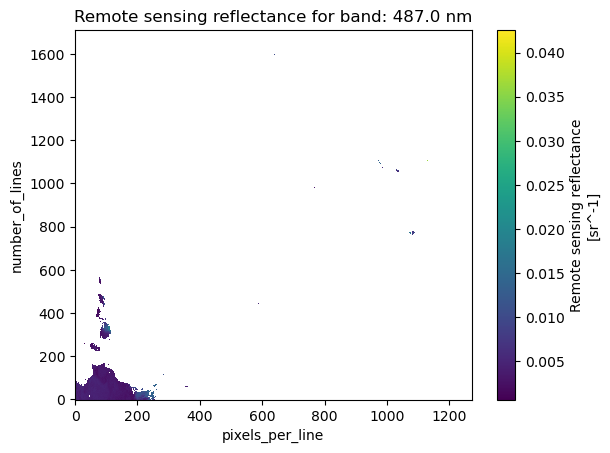

In [75]:
%matplotlib inline
plot = rrs.sel({"wavelength_3d": 60}).plot(cmap="viridis")
plt.title(f'Remote sensing reflectance for band: {wavelength_3d[60].data} nm' ) 

In [76]:
dataset = xr.merge((rrs, nav.coords))
dataset

<xarray.Dataset> Size: 2GB
Dimensions:    (number_of_lines: 1710, pixels_per_line: 1272, wavelength_3d: 184)
Coordinates:
    longitude  (number_of_lines, pixels_per_line) float32 9MB ...
    latitude   (number_of_lines, pixels_per_line) float32 9MB ...
Dimensions without coordinates: number_of_lines, pixels_per_line, wavelength_3d
Data variables:
    Rrs        (number_of_lines, pixels_per_line, wavelength_3d) float32 2GB ...
Attributes:
    long_name:      Remote sensing reflectance
    units:          sr^-1
    standard_name:  surface_ratio_of_upwelling_radiance_emerging_from_sea_wat...
    valid_min:      -30000
    valid_max:      25000

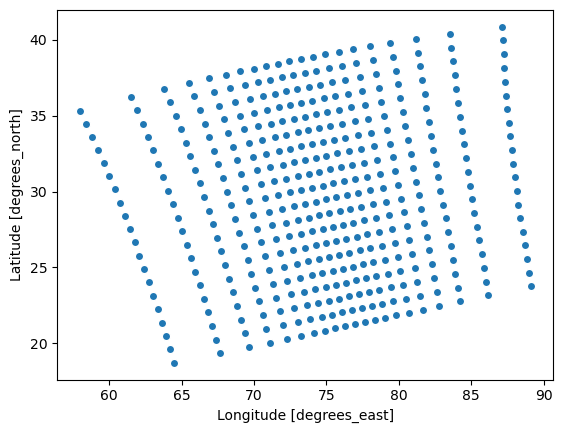

In [77]:
plot = dataset.sel(
    {
        "number_of_lines": slice(None, None, 1720 // 20),
        "pixels_per_line": slice(None, None, 1272 // 20),
    },
).plot.scatter(x="longitude", y="latitude")

Text(0.5, 1.0, 'Remote sensing reflectance for band: 588.0 nm')

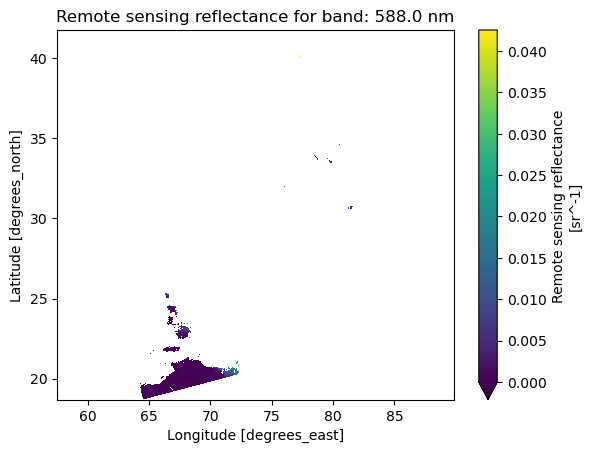

In [79]:
rrs = dataset["Rrs"].sel({"wavelength_3d": 100})
plot = rrs.plot(x="longitude", y="latitude", cmap="viridis", vmin=0)
plt.title(f'Remote sensing reflectance for band: {wavelength_3d[100].data} nm' )

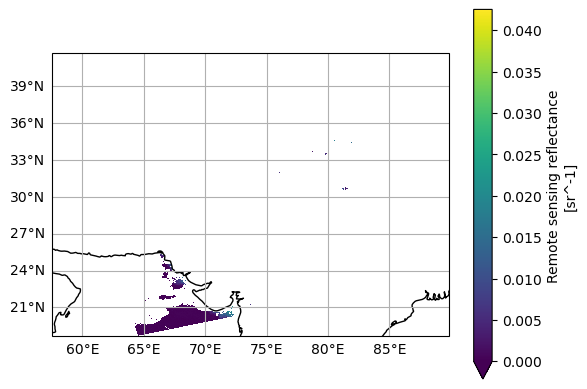

In [80]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = rrs.plot(x="longitude", y="latitude", cmap="viridis", vmin=0, ax=ax)

In [81]:
rrs_box = dataset["Rrs"].where(
    (
        (dataset["latitude"] > 67)
        & (dataset["latitude"] < 67.5)
        & (dataset["longitude"] > 20)
        & (dataset["longitude"] < 20.3)
    ),
    drop=True,
)
rrs_box.sizes

ValueError: Cannot apply_along_axis when any iteration dimensions are 0

In [82]:
rrs_stack = rrs_box.stack(
    {"pixel": ["number_of_lines", "pixels_per_line"]}, create_index=False,
)
plot = rrs_stack.plot.line(hue="pixel")

NameError: name 'rrs_box' is not defined